In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('sensor_data.csv')

# Convert the 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

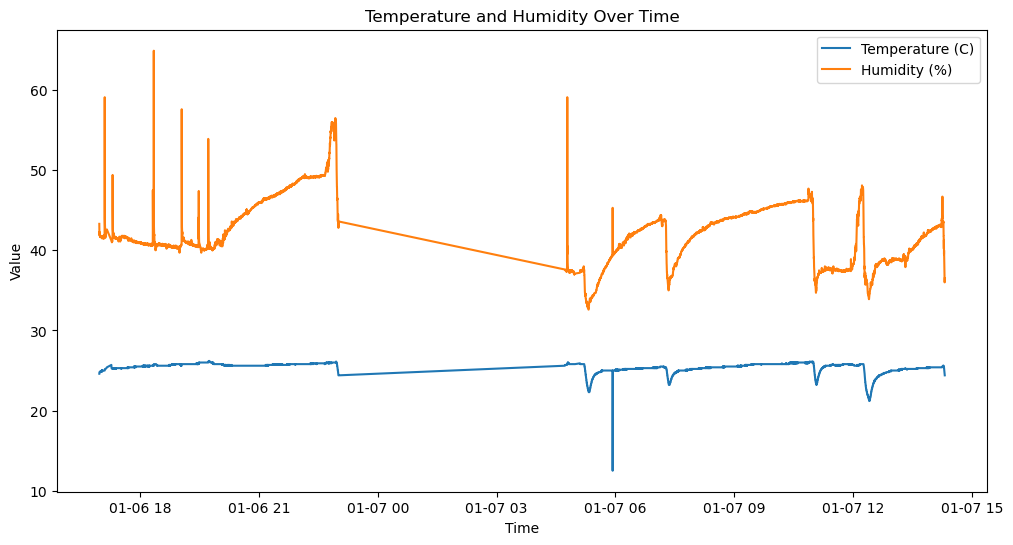

In [2]:
import matplotlib.pyplot as plt

# Plot Temperature
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Temperature'], label='Temperature (C)')
plt.plot(data['Time'], data['Humidity'], label='Humidity (%)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Temperature and Humidity Over Time')
plt.legend()
plt.show()

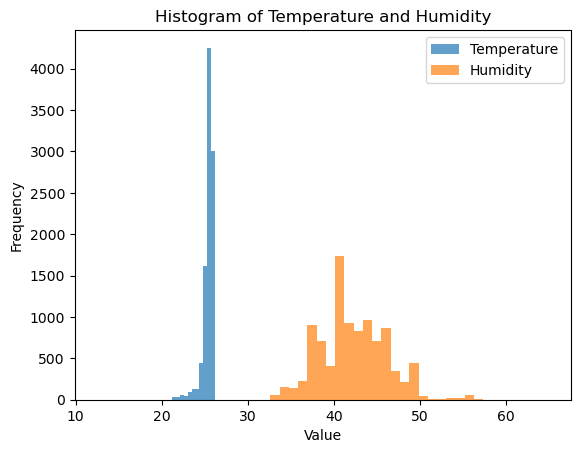

In [3]:
# Histogram of Temperature
data['Temperature'].plot(kind='hist', bins=30, alpha=0.7, label='Temperature')
data['Humidity'].plot(kind='hist', bins=30, alpha=0.7, label='Humidity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature and Humidity')
plt.legend()
plt.show()

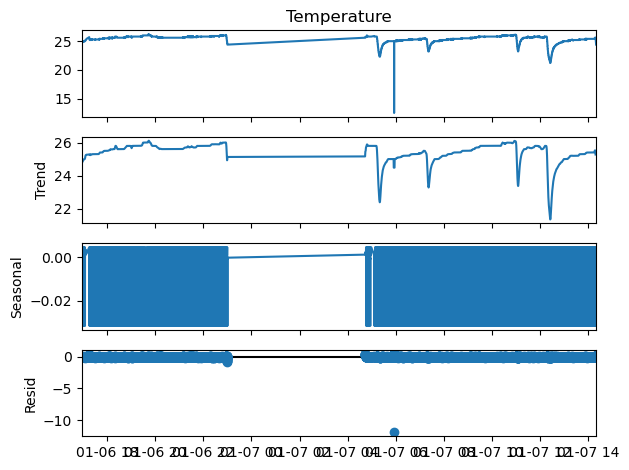

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your data is indexed by the datetime
data.set_index('Time', inplace=True)

# Decompose the temperature data
decomp_temp = seasonal_decompose(data['Temperature'], model='additive', period=24)  # adjust period based on your data's frequency

# Plotting the decomposed time series components
decomp_temp.plot()
plt.show()


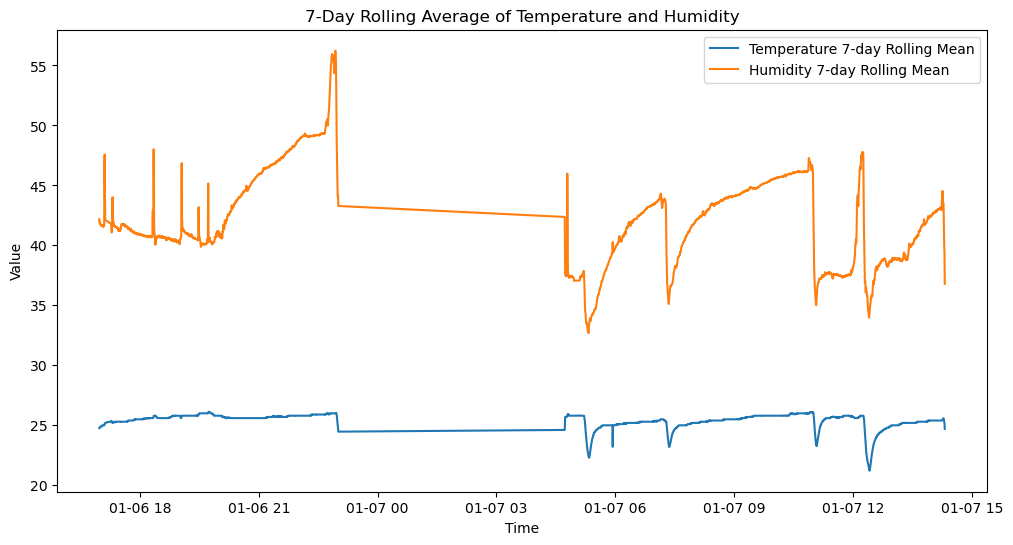

In [5]:
# 7-day rolling average
data['Temp_Rolling_Mean'] = data['Temperature'].rolling(window=7).mean()
data['Humidity_Rolling_Mean'] = data['Humidity'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Temp_Rolling_Mean'], label='Temperature 7-day Rolling Mean')
plt.plot(data['Humidity_Rolling_Mean'], label='Humidity 7-day Rolling Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('7-Day Rolling Average of Temperature and Humidity')
plt.legend()
plt.show()

/tmp/ipykernel_7545/3133049850.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


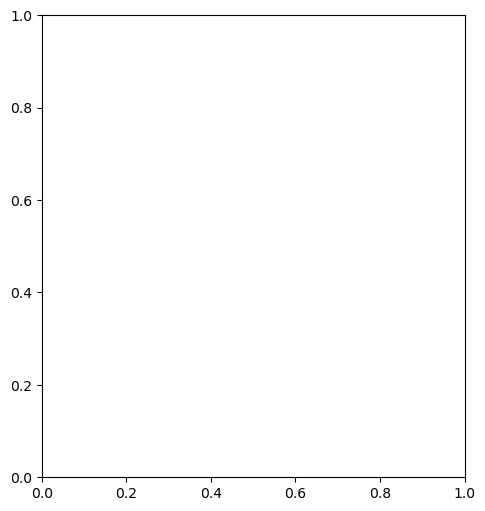

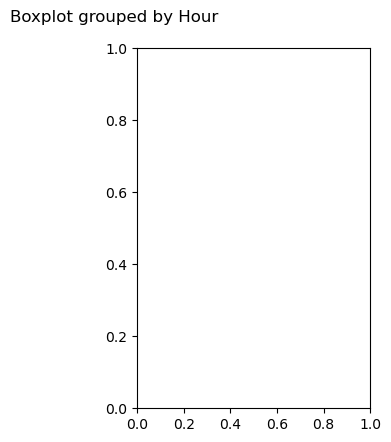

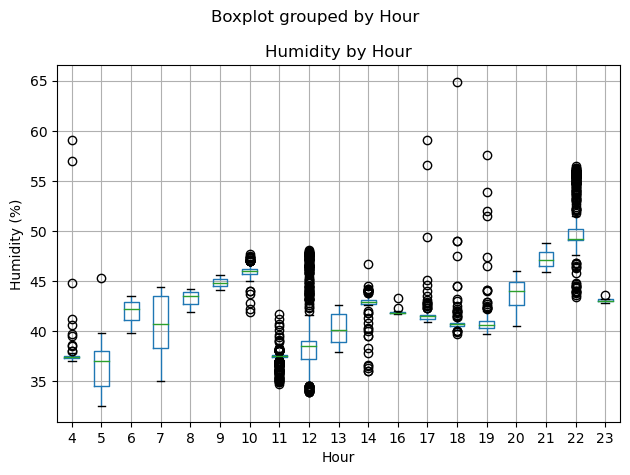

In [6]:
# Create a column for the hour of the day
data['Hour'] = data.index.hour

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data.boxplot(column='Temperature', by='Hour')
plt.title('Temperature by Hour')
plt.ylabel('Temperature (C)')

plt.subplot(1, 2, 2)
data.boxplot(column='Humidity', by='Hour')
plt.title('Humidity by Hour')
plt.ylabel('Humidity (%)')

plt.tight_layout()
plt.show()

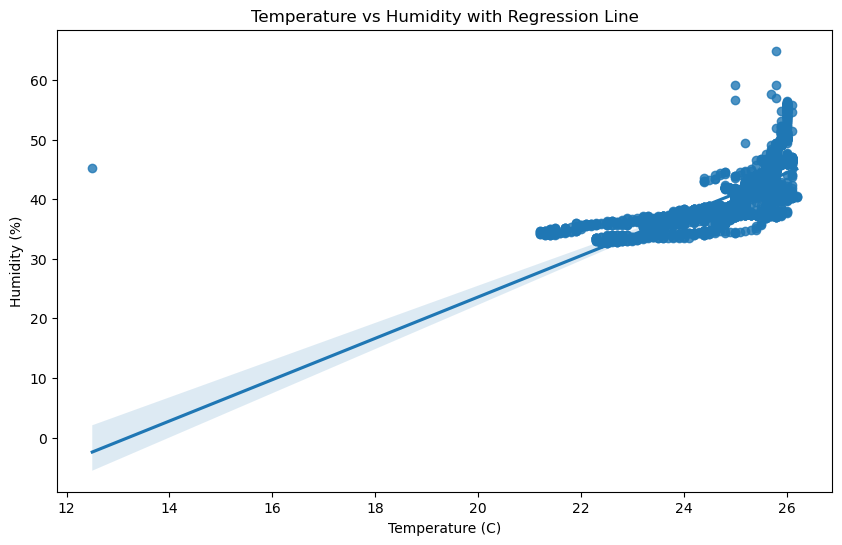

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='Temperature', y='Humidity', data=data)
plt.title('Temperature vs Humidity with Regression Line')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.show()


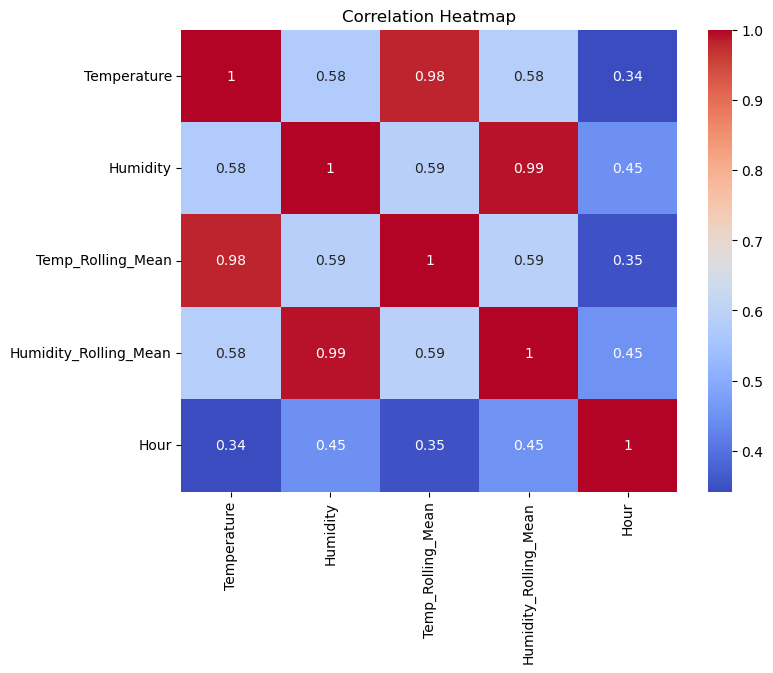

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()